In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

import numpy as np
import seaborn as sns

#Sklearn libraries
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report


#Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [7]:
#Utilities function

def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()
    
    
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['acc'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))
    
    
def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)
    
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)


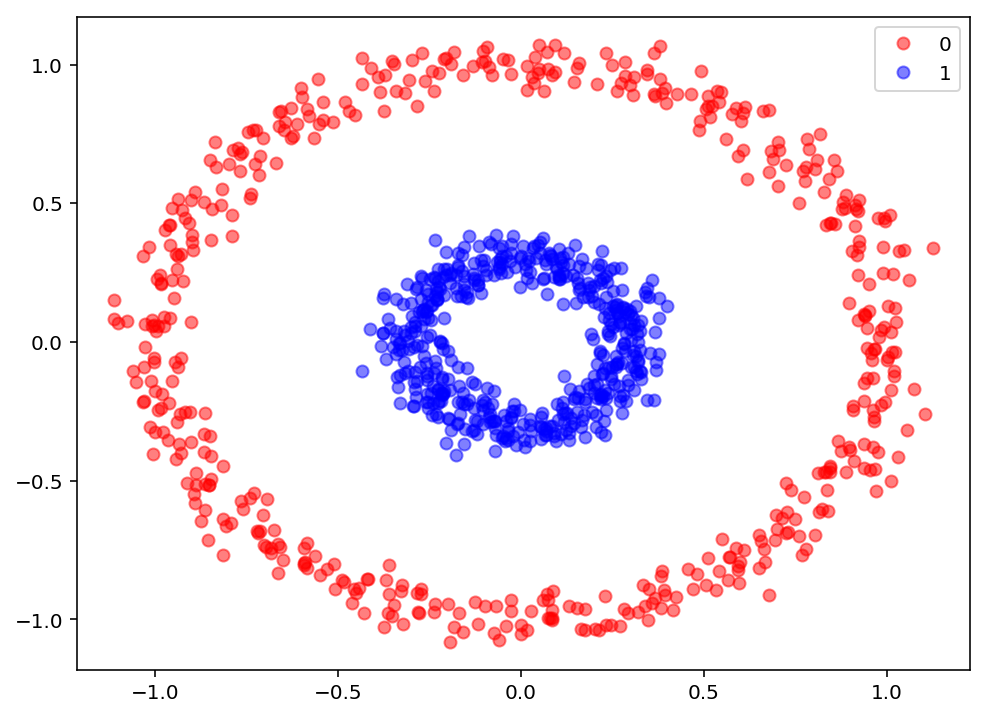

In [8]:
#Make circle dataset using sklearn
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
plot_data(X, y)

<Figure size 576x432 with 0 Axes>

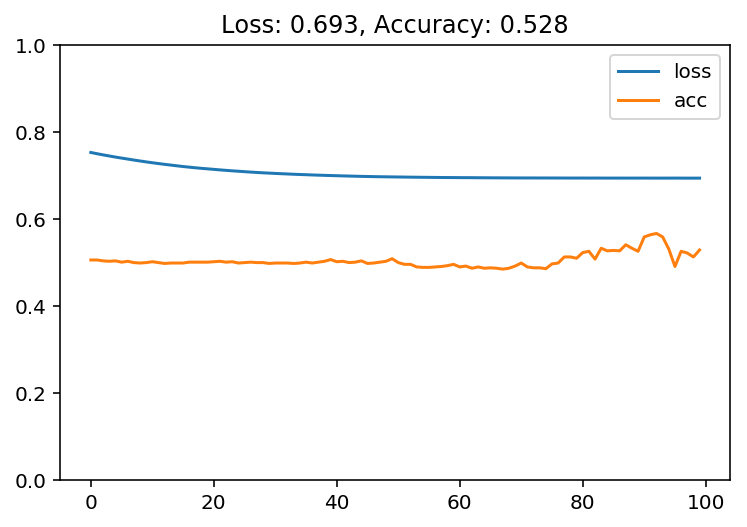

In [9]:
#Let's build another logistic model
model = Sequential()

model.add(Dense(1, input_shape =(2, ), activation = "sigmoid" ))

model.compile(optimizer='adam', loss= 'binary_crossentropy',  metrics=['accuracy'])

history = model.fit(x=X, y=y,verbose=0, epochs=100)

plot_loss_accuracy(history)

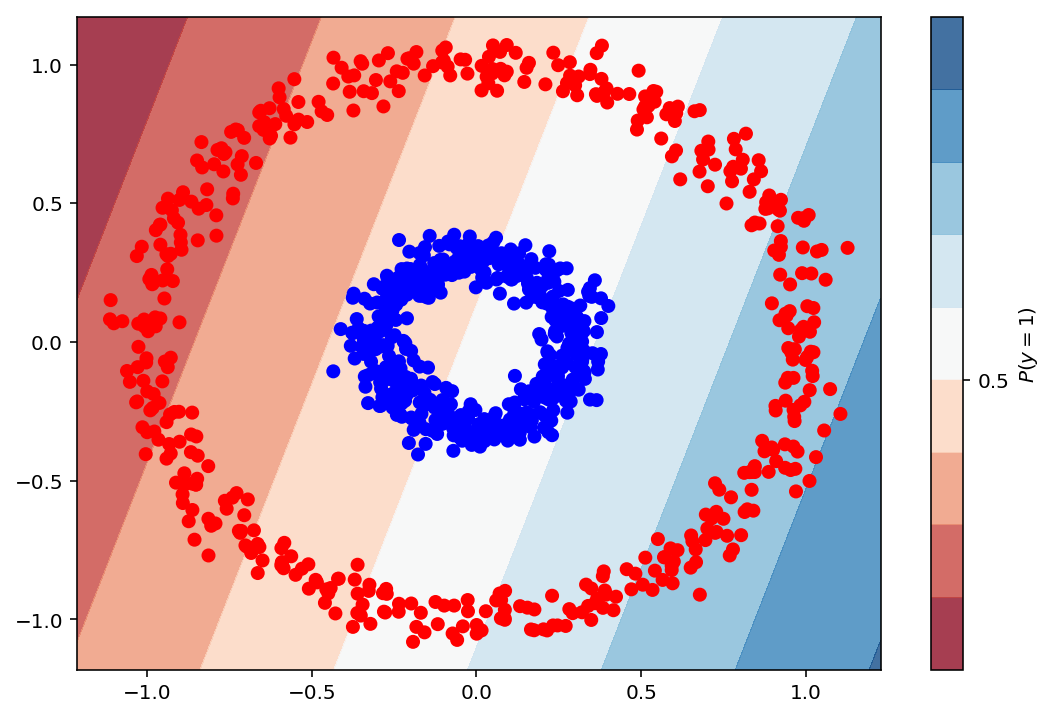

In [10]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

In [11]:
#decision boundary
y_pred = model.predict_classes(X, verbose= 0)

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.48      0.50       500
          1       0.51      0.55      0.53       500

avg / total       0.52      0.52      0.52      1000



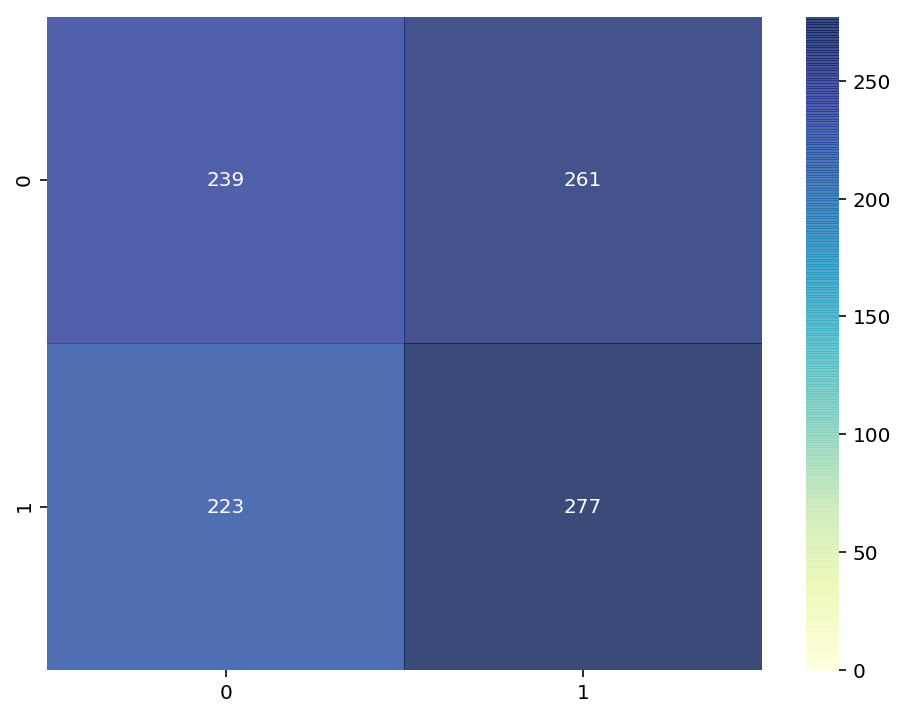

In [12]:
plot_confusion_matrix(model, X, y)

In [13]:
#We got very bad accuracy, let's try with ANN


<Figure size 576x432 with 0 Axes>

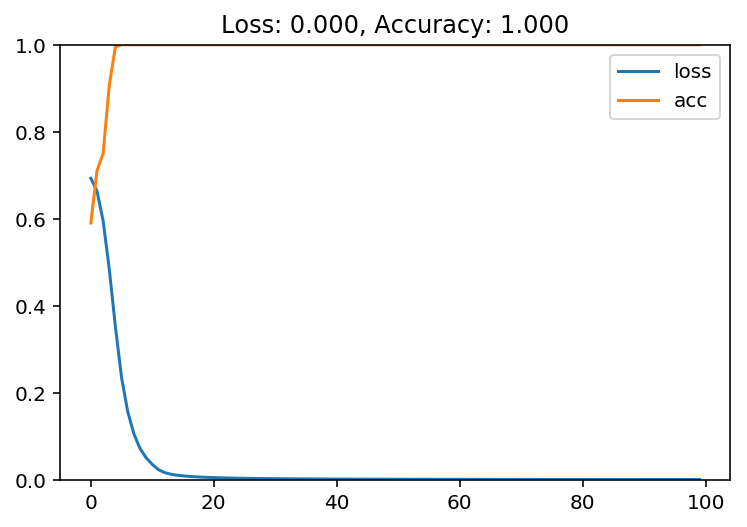

In [14]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation= 'tanh'))
          
model.add(Dense(3, activation= 'tanh'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(Adam(lr=0.01), "binary_crossentropy", metrics= ["accuracy"])

history = model.fit(x=X, y=y, verbose = 0, epochs=100)

plot_loss_accuracy(history)

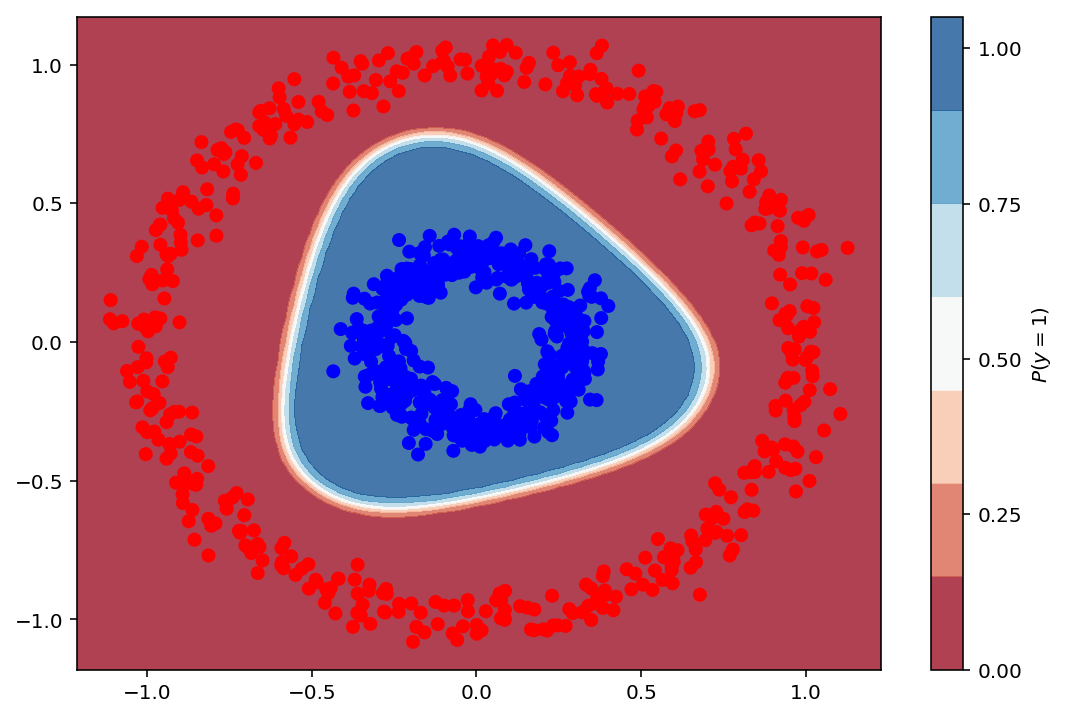

In [15]:
plot_decision_boundary(lambda x: model.predict(x), X, y)

In [19]:
y_pred = model.predict_classes(X, verbose =0)

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       500
          1       1.00      1.00      1.00       500

avg / total       1.00      1.00      1.00      1000



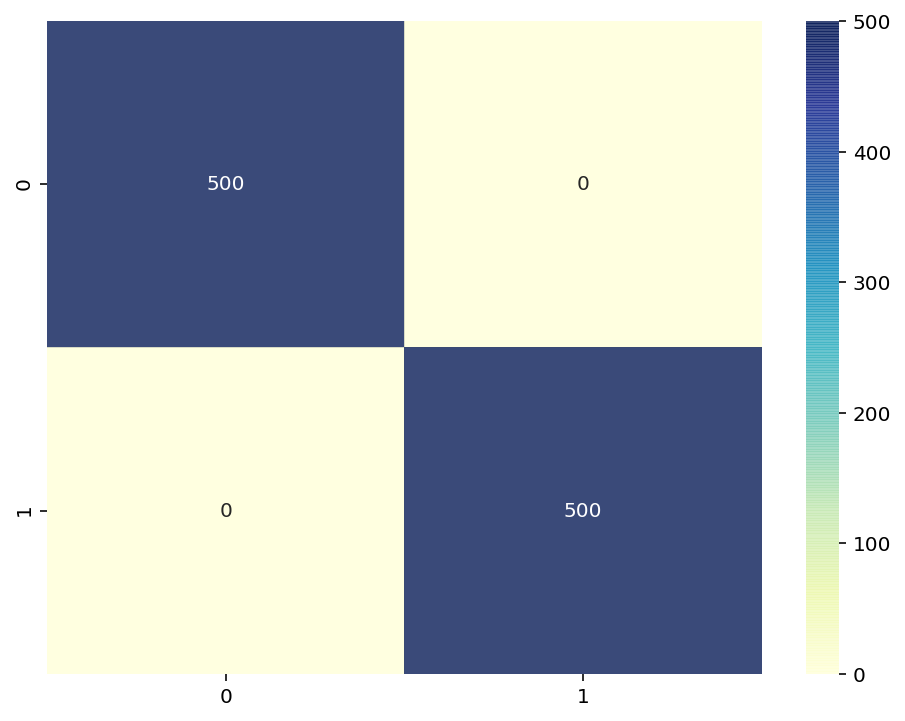

In [20]:
plot_confusion_matrix(model, X, y)

In [21]:
#Finally we got an ANN model with 100% accuracy

In [ ]:
#===================================THE END==========================================================#